In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv('datasets_175168_395113_CarPrice_Assignment-Copy1.csv')
dataset.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataset.shape

(205, 26)

In [4]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#Splitting company name from CarName column

CompanyName = dataset['CarName'].apply(lambda x : x.split(' ')[0])
dataset.insert(3,"CompanyName",CompanyName)
dataset.drop(['CarName'],axis=1,inplace=True)
dataset.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#data cleaning and correcting

def replace_name(a,b):
    dataset.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

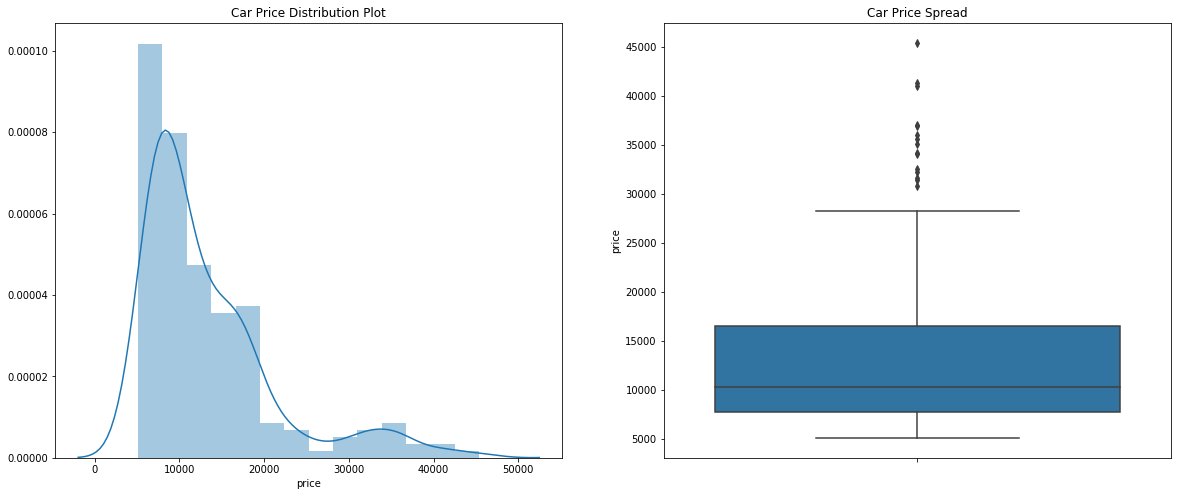

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sb.distplot(dataset.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sb.boxplot(y=dataset.price)

plt.show()

In [8]:
X = dataset.iloc[: ,:-1].values
#df = pd.DataFrame(X)
y = dataset.iloc[:, 25].values


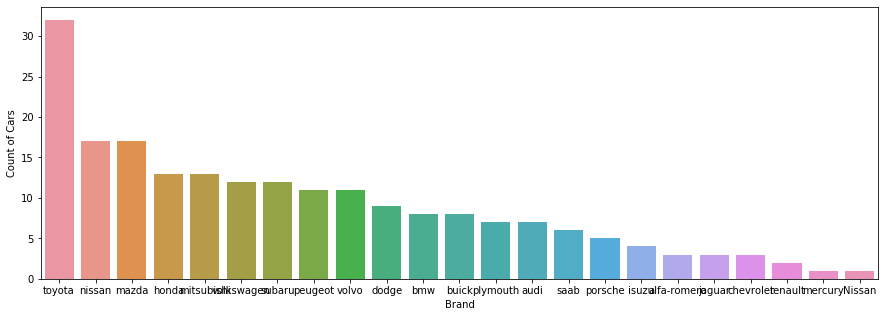

<Figure size 432x288 with 0 Axes>

In [9]:

#visualising categorical data

fig, ax = plt.subplots(figsize = (15,5))
plt1 = sb.countplot(dataset['CompanyName'], order=pd.value_counts(dataset['CompanyName']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
#xticks(rotation = 90)
plt.show()
plt.tight_layout()

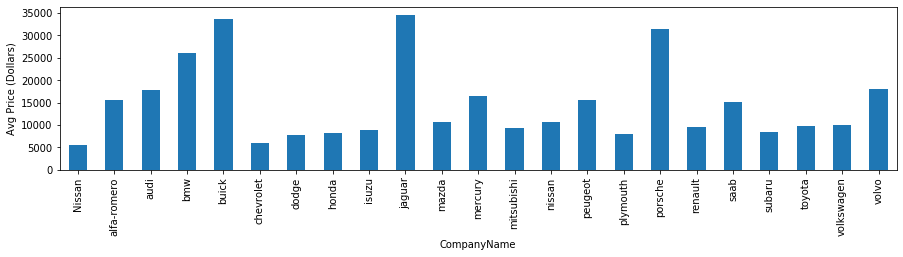

In [10]:
dataset_comp_avg_price = dataset[['CompanyName','price']].groupby("CompanyName", as_index = False).mean()
plt1 = dataset_comp_avg_price.plot(x = 'CompanyName', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("CompanyName")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

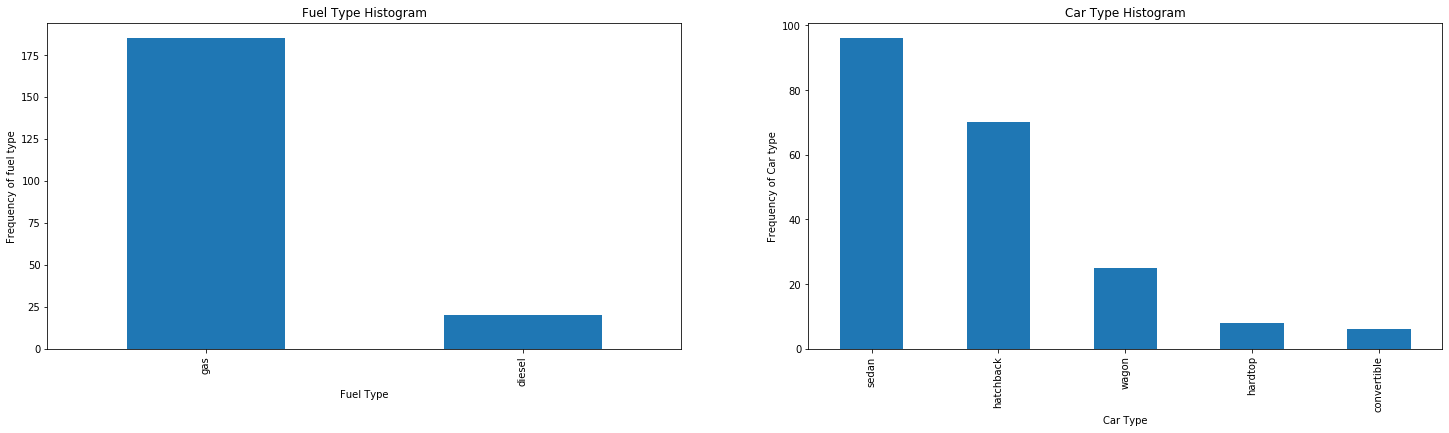

In [11]:


plt.figure(figsize=(25, 6))



plt.subplot(1,2,1)
plt1 = dataset.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,2,2)
plt1 = dataset.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

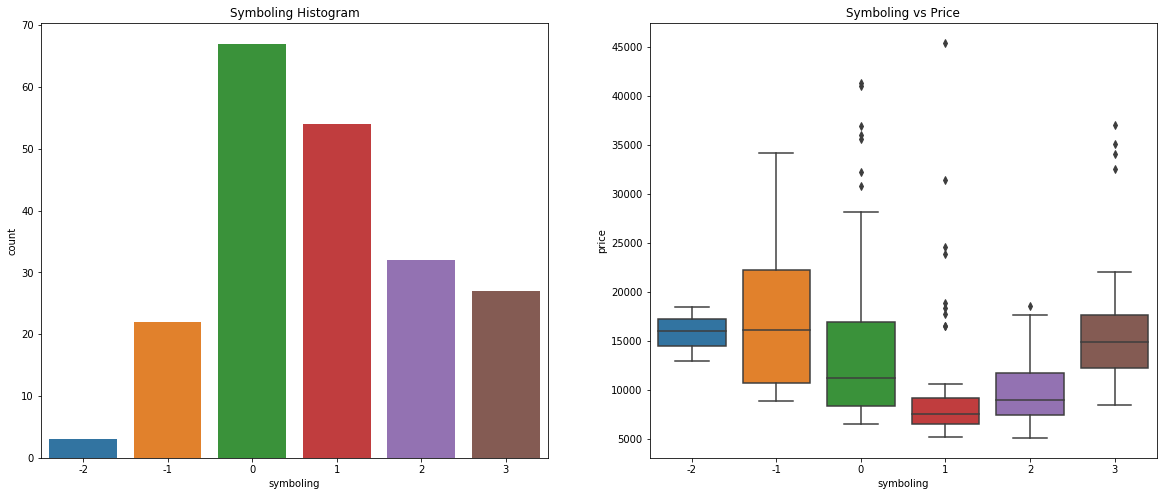

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sb.countplot(dataset.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sb.boxplot(x=dataset.symboling, y=dataset.price)

plt.show()

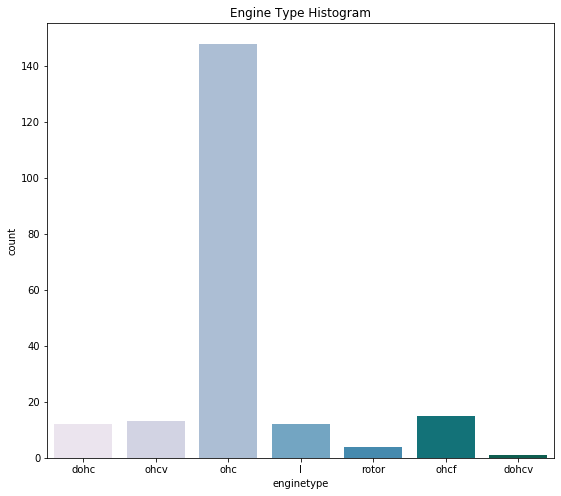

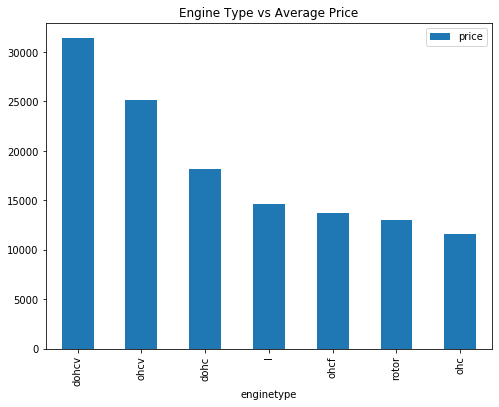

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sb.countplot(dataset.enginetype, palette=("PuBuGn"))




df = pd.DataFrame(dataset.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

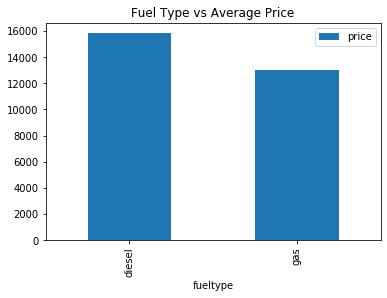

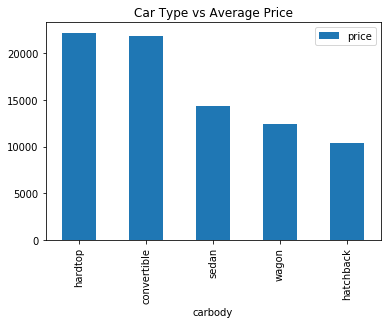

In [14]:
df = pd.DataFrame(dataset.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(dataset.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

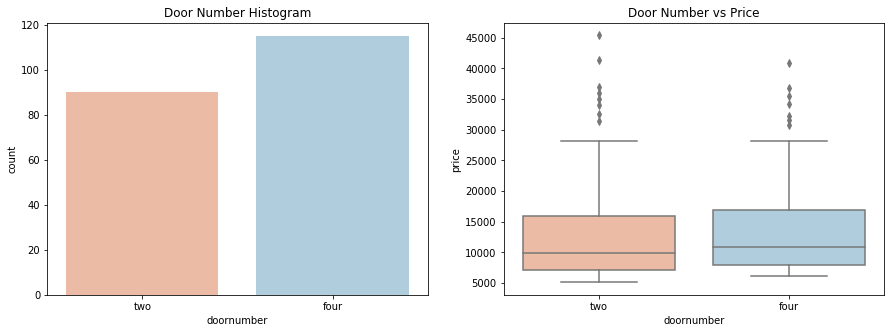

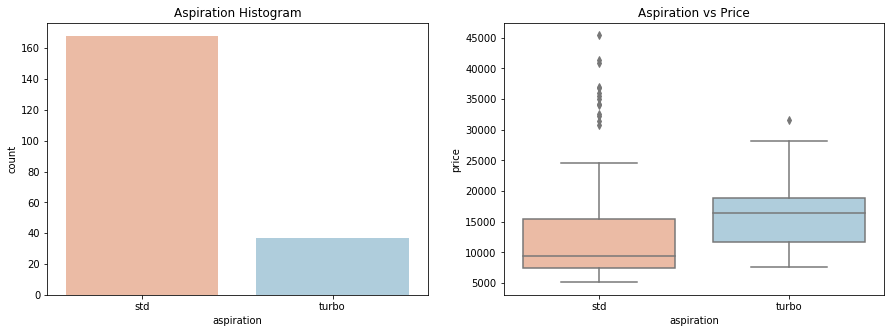

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sb.countplot(dataset.doornumber, palette=("RdBu"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sb.boxplot(x=dataset.doornumber, y=dataset.price, palette=("RdBu"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sb.countplot(dataset.aspiration, palette=("RdBu"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sb.boxplot(x=dataset.aspiration, y=dataset.price, palette=("RdBu"))

plt.show()

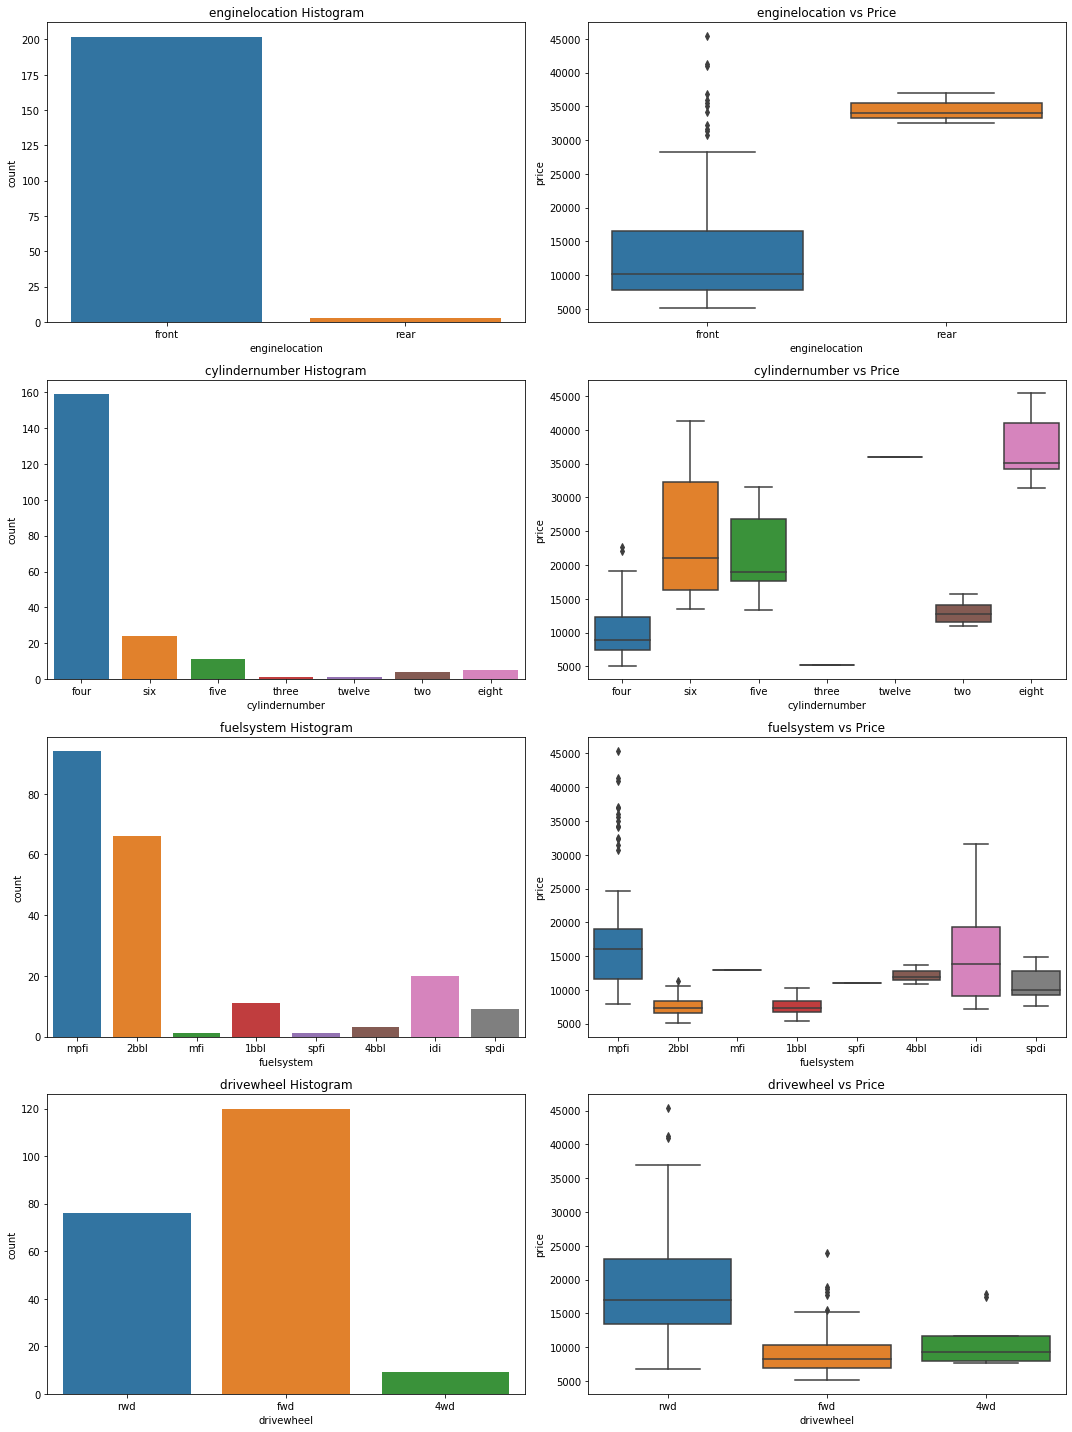

In [16]:
def plott(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sb.countplot(dataset[x])
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sb.boxplot(x=dataset[x], y=dataset.price)
    
plt.figure(figsize=(15,20))

plott('enginelocation', 1)
plott('cylindernumber', 3)
plott('fuelsystem', 5)
plott('drivewheel', 7)

plt.tight_layout()

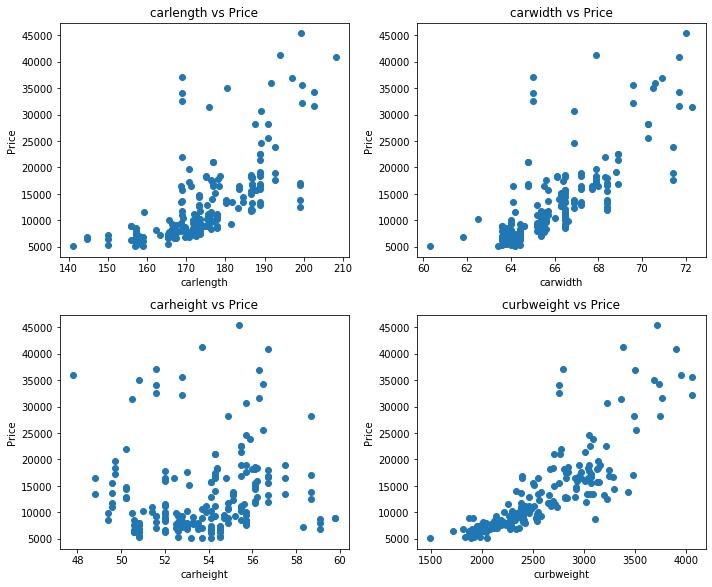

In [17]:
#Visualising numerical data


def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(dataset[x],dataset['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


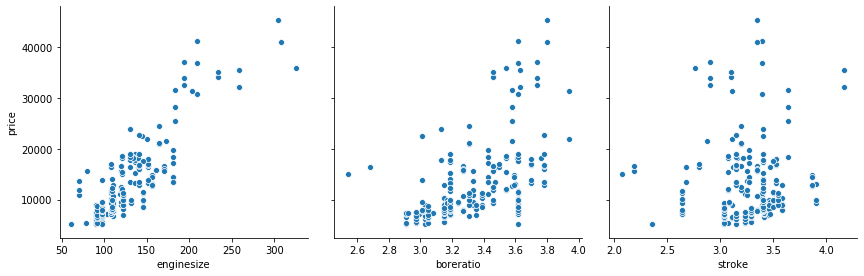

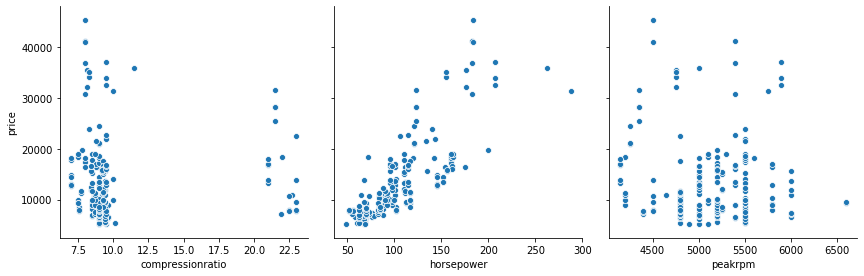

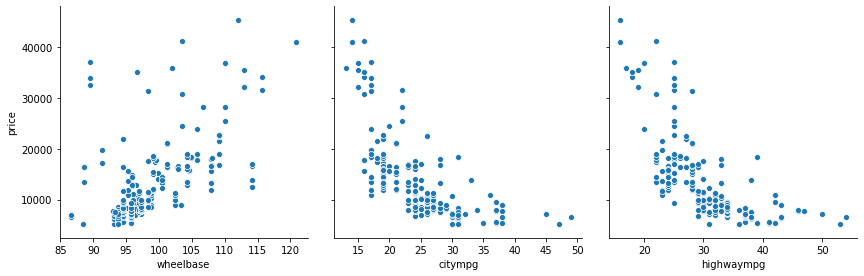

In [18]:
def other_attributes(x,y,z):
    sb.pairplot(dataset, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()
    
    
other_attributes('enginesize', 'boreratio', 'stroke')
other_attributes('compressionratio', 'horsepower', 'peakrpm')
other_attributes('wheelbase', 'citympg', 'highwaympg')


In [19]:
#adding a new feature.
dataset['mileage'] = dataset['citympg']*0.55 + dataset['highwaympg']*0.45
dataset.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [20]:
#setting up levels for price.
dataset["brand_category"] = dataset['price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else ("Luxury")))
dataset.head()



,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand_category
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Mid_Range
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Mid_Range
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Mid_Range
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Mid_Range
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Mid_Range


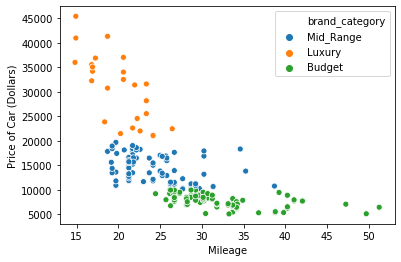

In [21]:
#bivariate analysis of mileage and price with company name
plt1 = sb.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = dataset)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

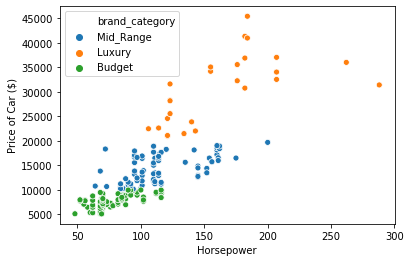

In [22]:
plt1 = sb.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = dataset)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car ($)')
plt.show()

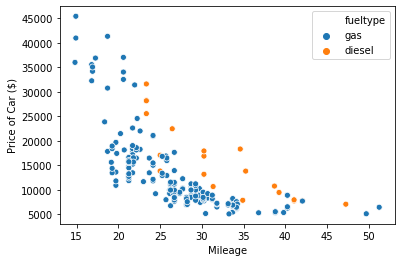

In [23]:
plt1 = sb.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = dataset)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car ($)')
plt.show()

In [24]:
attributes = dataset[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

attributes.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80


<Figure size 1080x1080 with 0 Axes>

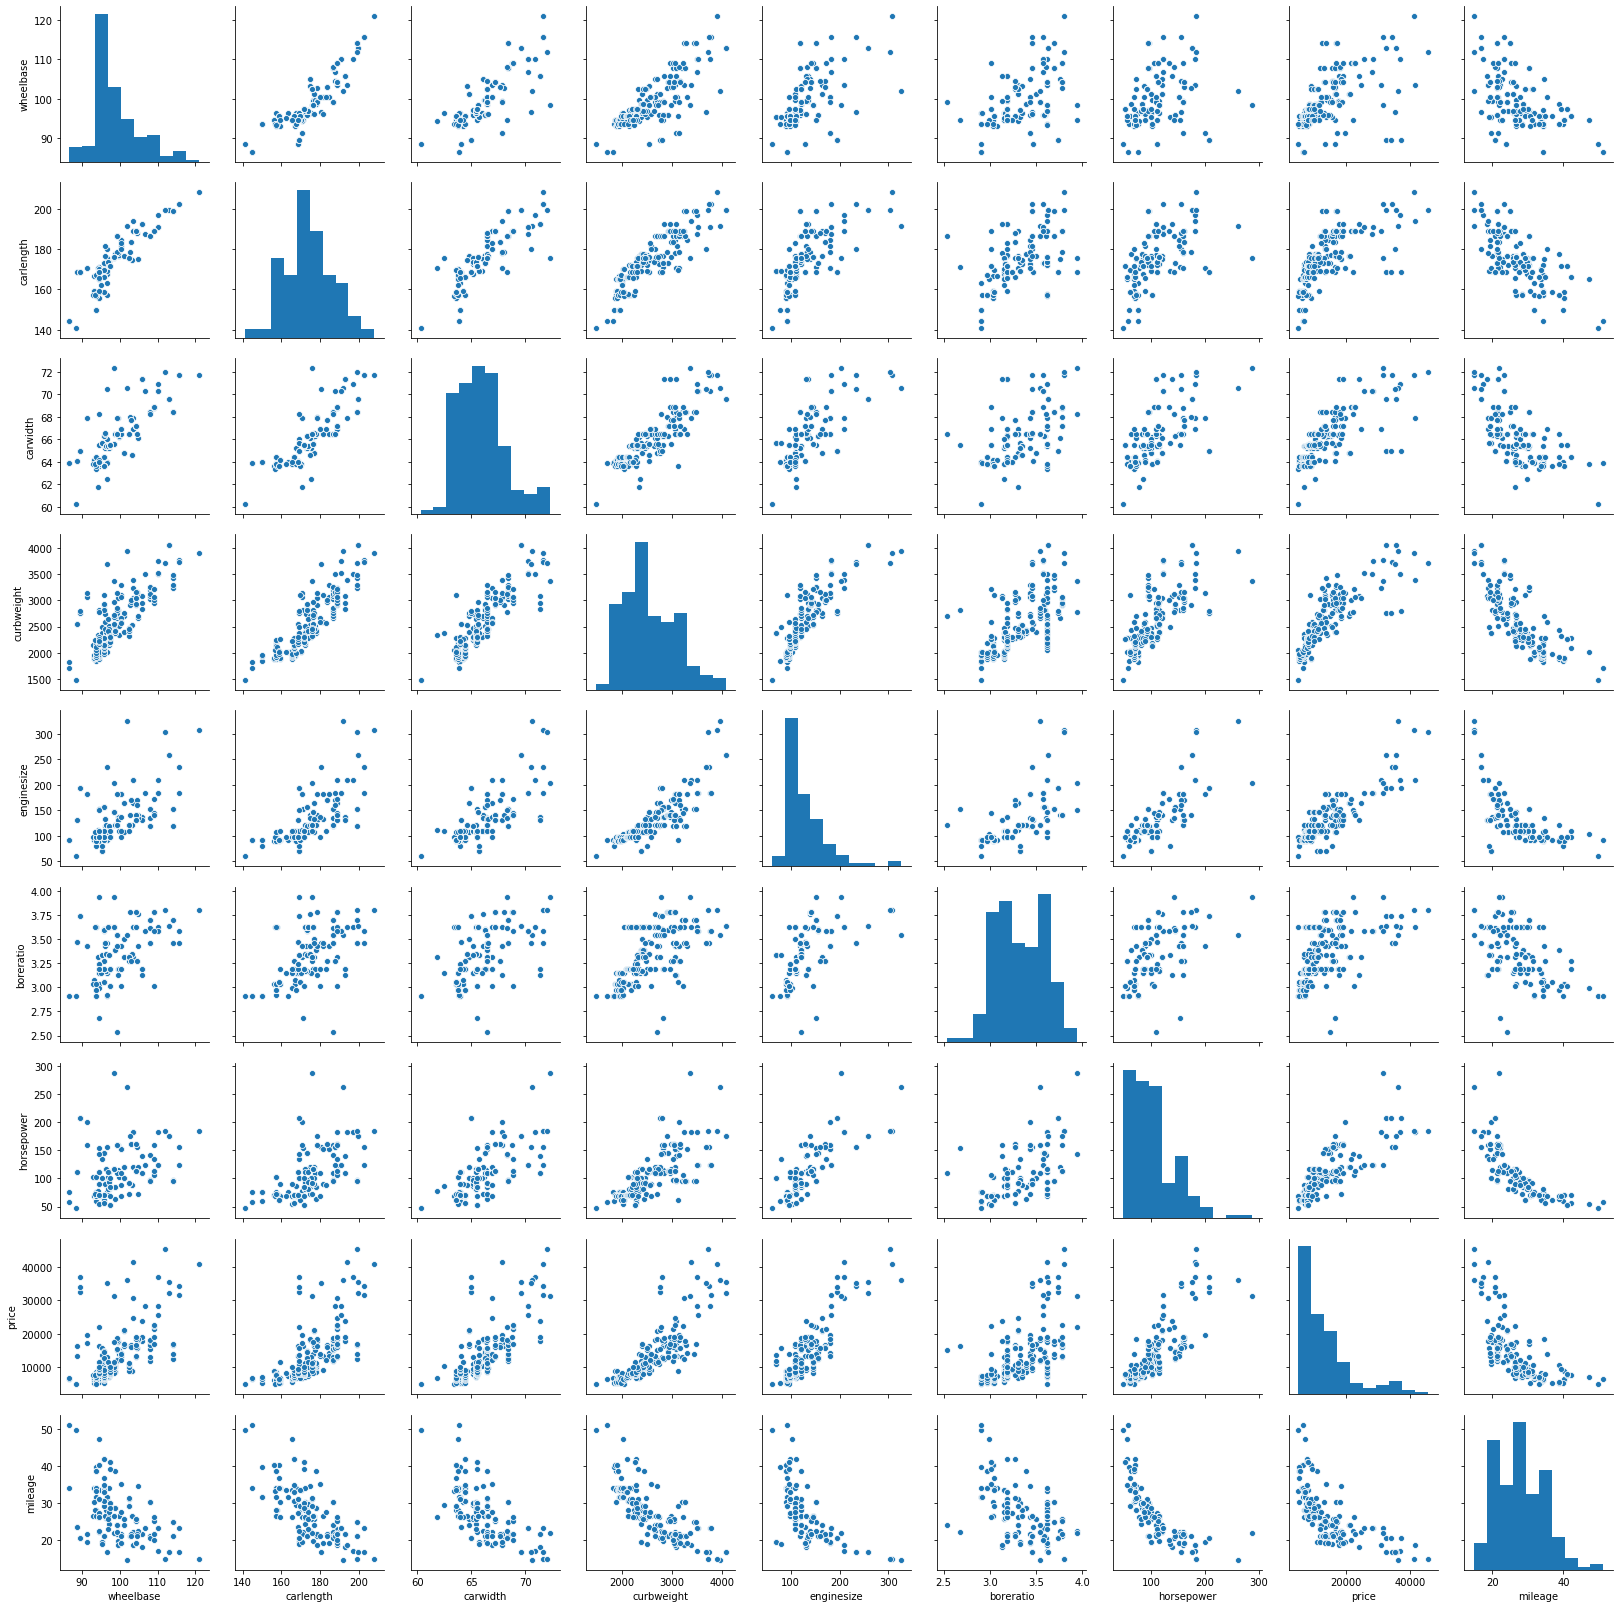

In [25]:
#visualising most of the attributes
plt.figure(figsize=(15,15))
sb.pairplot(attributes)
plt.show()

In [26]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the  attributes

attributes = dummies('fueltype',attributes)
attributes = dummies('aspiration',attributes)
attributes = dummies('carbody',attributes)
attributes = dummies('drivewheel',attributes)
attributes = dummies('enginetype',attributes)
attributes = dummies('cylindernumber',attributes)
attributes = dummies('brand_category',attributes)


In [27]:
attributes.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Luxury,Mid_Range
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,1,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,1,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,1,...,1,0,0,0,1,0,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,1,...,0,0,0,1,0,0,0,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,...,0,0,1,0,0,0,0,0,0,1


In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(attributes, y, test_size = 0.20, random_state = 0)



In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
X_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Luxury,Mid_Range
4,0.373178,0.503937,0.464646,0.472163,0.257812,0.515873,0.300000,0.342653,0.137174,1,...,0,0,1,0,0,0,0,0,0,1
71,0.845481,0.913386,1.000000,0.861453,0.640625,0.730159,0.490476,0.810541,0.057613,1,...,1,0,0,0,0,0,0,0,1,0
134,0.364431,0.661417,0.474747,0.422439,0.199219,0.000000,0.276190,0.275269,0.256516,1,...,0,0,0,1,0,0,0,0,0,1
145,0.303207,0.431496,0.363636,0.338717,0.148438,0.857143,0.280952,0.169551,0.314129,1,...,0,0,0,1,0,0,0,0,0,1
122,0.206997,0.357480,0.202020,0.203145,0.109375,0.341270,0.076190,0.067496,0.530864,1,...,0,0,0,1,0,0,0,0,0,0


In [31]:
X_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Luxury,Mid_Range
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000
mean,0.358778,0.471404,0.416174,0.366753,0.223847,0.631243,0.248374,0.226752,0.350304,0.884146,...,0.067073,0.018293,0.054878,0.786585,0.115854,0.0,0.006098,0.018293,0.128049,0.396341
std,0.180212,0.191010,0.210363,0.222075,0.160825,0.216382,0.180986,0.217297,0.180322,0.321030,...,0.250915,0.134418,0.228440,0.410973,0.321030,0.0,0.078087,0.134418,0.335168,0.490635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.357480,0.229798,0.203039,0.109375,0.484127,0.085714,0.072410,0.199246,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.303207,0.450394,0.368687,0.299193,0.195312,0.626984,0.209524,0.147491,0.326475,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.460641,0.629921,0.515152,0.529006,0.277344,0.833333,0.309524,0.316259,0.466392,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


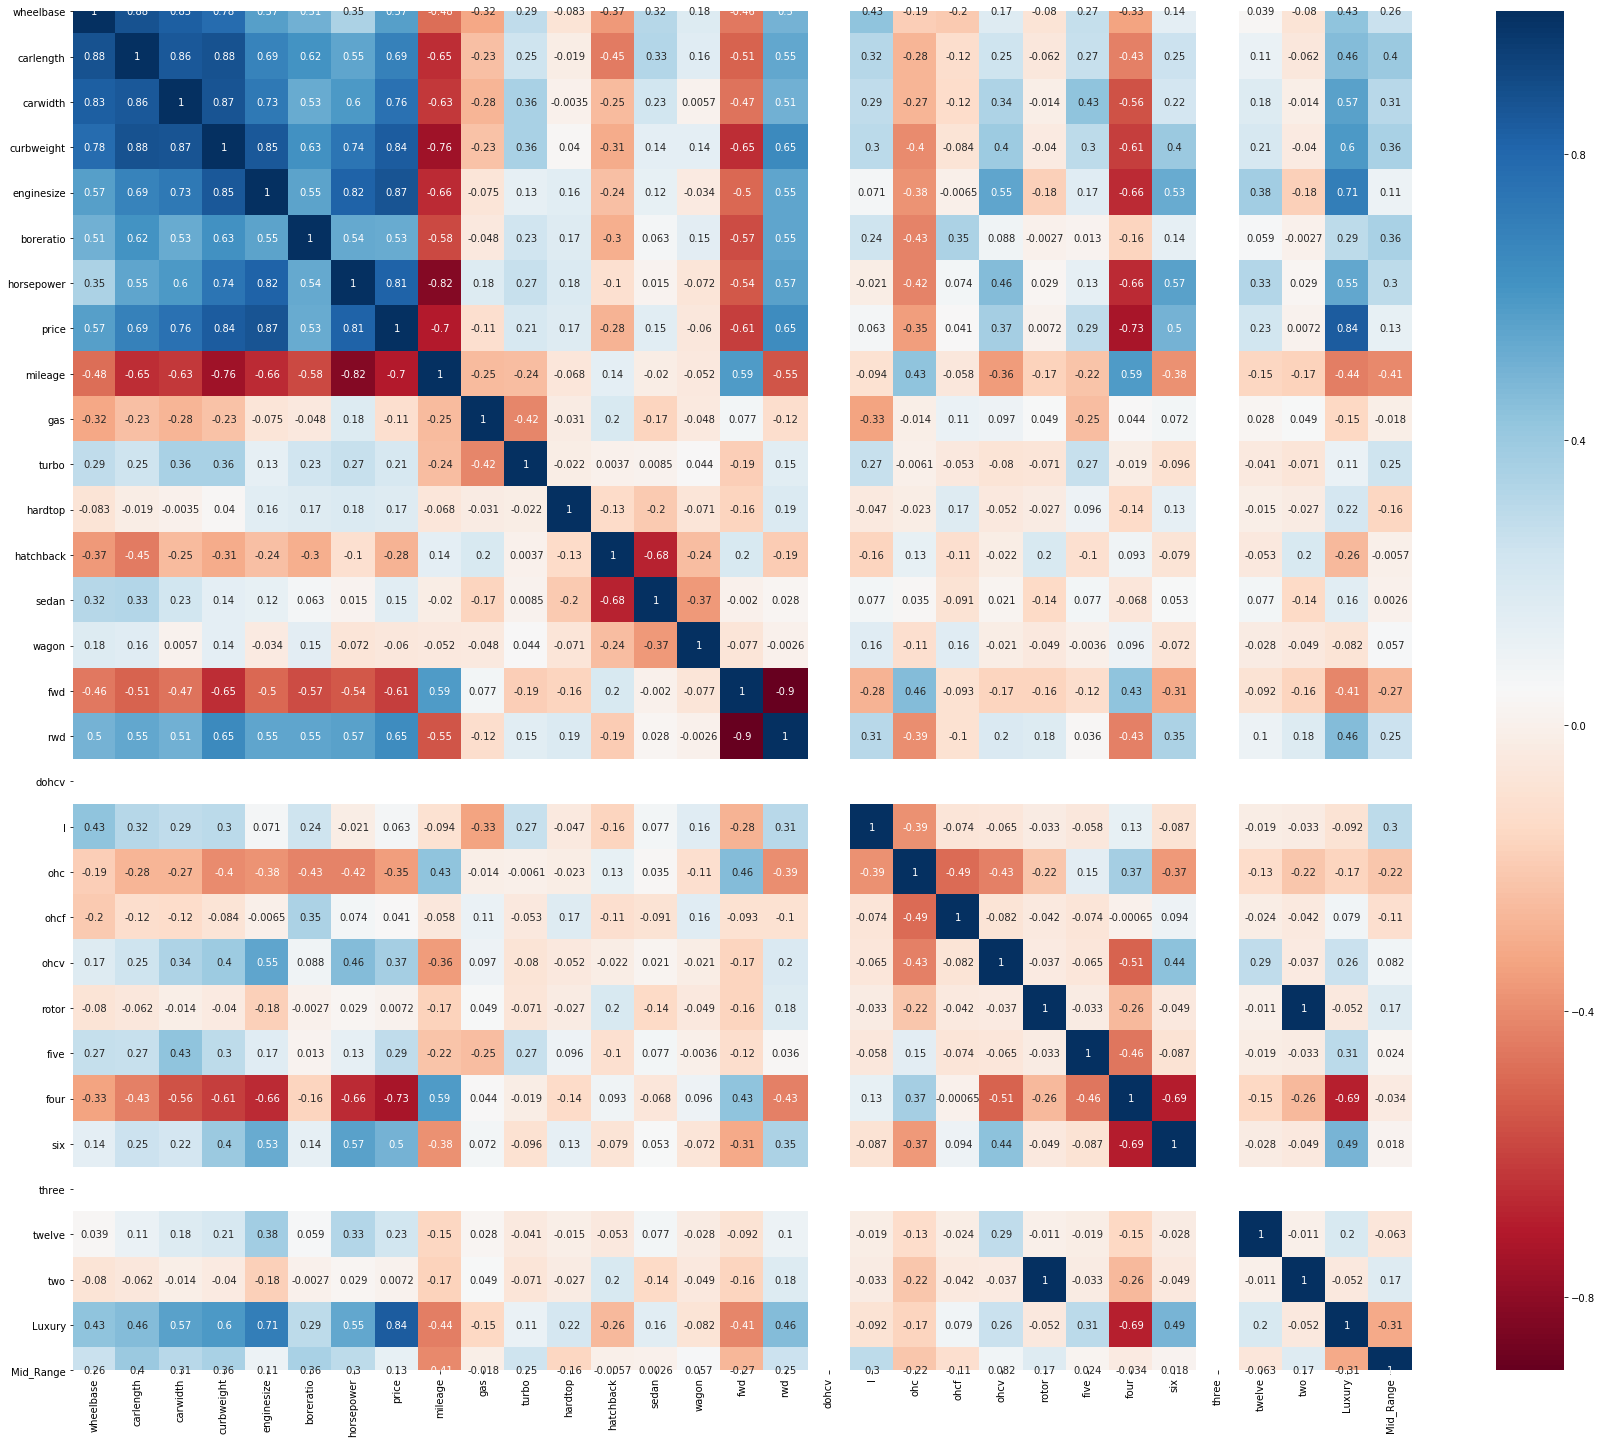

In [32]:
plt.figure(figsize = (30, 25))
sb.heatmap(X_train.corr(), annot = True, cmap="RdBu")
plt.show()

In [33]:
y_train = X_train.pop('price')
X_train_new = X_train

In [34]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_new.astype(float)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              282.9
Date:                Wed, 05 Aug 2020   Prob (F-statistic):                   9.50e-107
Time:                        14:20:01   Log-Likelihood:                          288.64
No. Observations:                 164   AIC:                                     -523.3
Df Residuals:                     137   BIC:                                     -439.6
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wheelbase      0.0727      0.065      1.122      0.264      -0.055       0.201
carlength     -0.0079      0.069     -0.115      0.909      -0.144       0.129
carwidth       0.0187      0.056      0.336      0.737      -0.092       0.129
curbweight     0.1320      0.088      1.503      0.135      -0.042       0.306
enginesize     0.2162      0.111      1.955      0.053      -0.002       0.435
boreratio     -0.1143      0.040     -2.837      0.005      -0.194      -0.035
horsepower     0.6612      0.075      8.761      0.000       0.512       0.810
mileage        0.1579      0.049      3.237      0.002       0.061       0.254
gas           -0.0387      0.020     -1.947      0.054      -0.078       0.001
turbo         -0.0608      0.016     -3.699      0.000      -0.093      -0.028
hardtop       -0.0934      0.033     -2.854      0.005      -0.158      -0.029
hatchback     -0.0790      0.029     -2.732      0.007      -0.136      -0.022
sedan         -0.0606      0.030     -2.041      0.043      -0.119      -0.002
wagon         -0.0751      0.033     -2.266      0.025      -0.141      -0.010
fwd           -0.0219      0.023     -0.934      0.352      -0.068       0.024
rwd            0.0076      0.025      0.301      0.764      -0.042       0.057
dohcv      -6.728e-17   9.87e-17     -0.682      0.497   -2.62e-16    1.28e-16
l              0.0523      0.027      1.933      0.055      -0.001       0.106
ohc            0.0389      0.019      2.024      0.045       0.001       0.077
ohcf           0.0800      0.028      2.861      0.005       0.025       0.135
ohcv          -0.0099      0.026     -0.386      0.700      -0.061       0.041
rotor          0.0411      0.030      1.350      0.179      -0.019       0.101
five          -0.0264      0.042     -0.627      0.532      -0.110       0.057
four          -0.0161      0.051     -0.318      0.751      -0.116       0.084
six           -0.1199      0.036     -3.325      0.001      -0.191      -0.049
three      -1.055e-17   7.92e-18     -1.333      0.185   -2.62e-17     5.1e-18
twelve        -0.3313      0.065     -5.067      0.000      -0.461      -0.202
two            0.0411      0.030      1.350      0.179      -0.019       0.101
Luxury         0.3386      0.028     11.949      0.000       0.283       0.395
Mid_Range      0.0620      0.013      4.681      0.000       0.036       0.088
==============================================================================
Omnibus:                        2.340   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.911
Skew:                           0.239   Prob(JB):                        0.385
Kurtosis:                       3.227   Cond. No.            

In [35]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X


In [36]:
X_train_new = build_model(X_train.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           2.29e-85
Time:                        14:20:01   Log-Likelihood:                 292.00
No. Observations:                 164   AIC:                            -528.0
Df Residuals:                     136   BIC:                            -441.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1984      0.083      2.385      0.0

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
X_train_new = X_train.drop(['rwd'], axis = 1)
X_train_new = build_model(X_train_new.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           1.91e-86
Time:                        14:20:01   Log-Likelihood:                 291.98
No. Observations:                 164   AIC:                            -530.0
Df Residuals:                     137   BIC:                            -446.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1958      0.081      2.408      0.0

In [38]:
X_train_new = X_train_new.drop(['two'], axis = 1)
X_train_new = X_train_new.drop(['rotor'], axis = 1)
X_train_new = X_train_new.drop(['carlength'], axis = 1)
X_train_new = X_train_new.drop(['carwidth'], axis = 1)
X_train_new = build_model(X_train_new.astype(float),y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           1.49e-89
Time:                        14:20:01   Log-Likelihood:                 291.43
No. Observations:                 164   AIC:                            -534.9
Df Residuals:                     140   BIC:                            -460.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1433      0.052      2.751      0.0

In [39]:
X_train_new = X_train_new.drop(['ohcv'], axis = 1)
X_train_new = X_train_new.drop(['curbweight'], axis = 1)
X_train_new = X_train_new.drop(['wheelbase'], axis = 1)
X_train_new = build_model(X_train_new.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     180.6
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           5.82e-91
Time:                        14:20:01   Log-Likelihood:                 286.11
No. Observations:                 164   AIC:                            -530.2
Df Residuals:                     143   BIC:                            -465.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1609      0.047      3.402      0.0

In [40]:
X_train_new = X_train_new.drop(['mileage'], axis = 1)

X_train_new = build_model(X_train_new.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           7.22e-92
Time:                        14:20:01   Log-Likelihood:                 285.48
No. Observations:                 164   AIC:                            -531.0
Df Residuals:                     144   BIC:                            -469.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1930      0.036      5.329      0.0

In [41]:
X_train_new = X_train_new.drop(['wagon'], axis = 1)
X_train_new = X_train_new.drop(['sedan'], axis = 1)

X_train_new = build_model(X_train_new.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     209.8
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           1.98e-93
Time:                        14:20:01   Log-Likelihood:                 283.47
No. Observations:                 164   AIC:                            -530.9
Df Residuals:                     146   BIC:                            -475.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1552      0.030      5.232      0.0

In [42]:
X_train_new = X_train_new.drop(['four'], axis = 1)

X_train_new = build_model(X_train_new.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           5.77e-94
Time:                        14:20:01   Log-Likelihood:                 281.80
No. Observations:                 164   AIC:                            -529.6
Df Residuals:                     147   BIC:                            -476.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1279      0.025      5.056      0.0

In [43]:
X_train_new = X_train_new.drop(['five'], axis = 1)
X_train_new = X_train_new.drop(['ohc'], axis = 1)
X_train_new = X_train_new.drop(['ohcf'], axis = 1)

X_train_new = build_model(X_train_new.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     267.8
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           1.12e-96
Time:                        14:20:01   Log-Likelihood:                 279.47
No. Observations:                 164   AIC:                            -530.9
Df Residuals:                     150   BIC:                            -487.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1254      0.022      5.606      0.0

In [44]:
X_train_new = X_train_new.drop(['l'], axis = 1)
X_train_new = X_train_new.drop(['dohcv'], axis = 1)
X_train_new = X_train_new.drop(['three'], axis = 1)


X_train_new = build_model(X_train_new.astype(float),y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     285.4
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           3.46e-97
Time:                        14:20:01   Log-Likelihood:                 277.63
No. Observations:                 164   AIC:                            -529.3
Df Residuals:                     151   BIC:                            -489.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.022      5.904      0.0

In [45]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

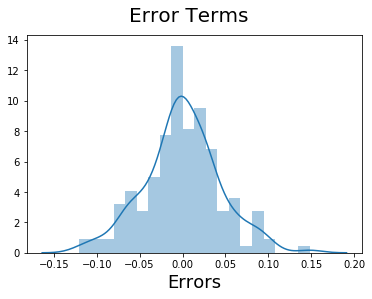

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sb.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [47]:
num_vars = ['turbo', 'enginesize', 'boreratio','gas','fwd','hardtop', 'horsepower','price']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
#Dividing into X and y
y_test = X_test.pop('price')
XX_test = X_test

In [49]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = XX_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
y_pred = lm.predict(X_test_new.astype(float))

In [51]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7961210373569783

Text(0, 0.5, 'y_pred')

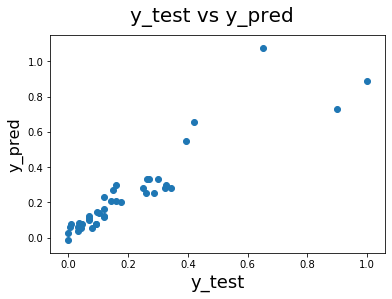

In [52]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     285.4
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           3.46e-97
Time:                        14:20:02   Log-Likelihood:                 277.63
No. Observations:                 164   AIC:                            -529.3
Df Residuals:                     151   BIC:                            -489.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.022      5.904      0.0